<div align="center">
    <h1>Data Analysis on Home Gaurds Dataset</h1>
    <h2>Source: data.gov.in<h2>
</div>


## Domain Knowledge:
#### This is related to Government Workforce Data Analysis, specifically concerning Home Guards, who are a voluntary force often assisting law enforcement agencies. This domain involves:

##### 1. Public Safety & Security: Home Guards assist police in maintaining law and order.

##### 2. Government Workforce Management: Understanding employment trends, performance, and resource allocation.
##### 3. Data Cleaning & Analysis: Handling missing data, duplicates, and ensuring accuracy.

## Loading the Dataset
In this section, we load the dataset using Pandas and check its structure by displaying the first few rows. 


In [525]:
import pandas as pd
import numpy as np


In [527]:
df = pd.read_csv('Home_Guards.csv')

In [529]:
df.head()

,SL. NO.,NAME OF THE DISTRICT,NUMBER OF UNITS,ALLOTTED STRENGTH,NO. OF HOME GUARDS(men),NO. OF HOME GUARDS(women),ACTUAL STRENGTH,VACANCY,Unnamed: 8,Unnamed: 9
0,1,Bengaluru North,18,1850,834,786,1620,230,NaN,NaN
1,2,Bengaluru Rural,15,1650,846,411,1257,393,NaN,NaN
2,3,Bengaluru South,15,1850,1131,708,1839,11,NaN,NaN
3,4,Bagalkot,23,1000,889,88,977,23,NaN,NaN
4,5,Belagavi,30,1350,1078,60,1138,212,NaN,NaN


## Data Cleaning
Here, we handle missing values, remove duplicates, and ensure the dataset is clean for further analysis.


In [531]:
df = df.drop(columns=["Unnamed: 8", "Unnamed: 9"], errors='ignore')


df.columns = [
    "SL_NO", "District", "Units", "Allotted_Strength",
    "Home_Guards_Men", "Home_Guards_Women", "Actual_Strength", "Vacancy"
]

#### Drop the columns with NaN values

In [435]:
df

,SL_NO,District,Units,Allotted_Strength,Home_Guards_Men,Home_Guards_Women,Actual_Strength,Vacancy
0,1,Bengaluru North,18,1850,834,786,1620,230
1,2,Bengaluru Rural,15,1650,846,411,1257,393
2,3,Bengaluru South,15,1850,1131,708,1839,11
3,4,Bagalkot,23,1000,889,88,977,23
4,5,Belagavi,30,1350,1078,60,1138,212
5,6,Ballari,20,1500,1378,100,1478,22
6,7,Bidar,15,1000,852,125,977,23
7,8,Chikkamagaluru,20,800,442,75,517,283
8,9,Chamarajanagar,9,700,630,69,699,1
9,10,Chitradurga,14,700,626,74,700,0


In [541]:
df["Vacancy_Percentage"] = (df["Vacancy"] / df["Allotted_Strength"]) * 100

In [537]:
df["Men_to_Women_Ratio"] = df["Home_Guards_Men"] / df["Home_Guards_Women"].replace(0,1)

In [543]:
df["Fulfillment_Rate (%)"] = ((df["Actual_Strength"] / df["Allotted_Strength"]) * 100).round(2)

In [545]:
df

,SL_NO,District,Units,Allotted_Strength,Home_Guards_Men,Home_Guards_Women,Actual_Strength,Vacancy,Men_to_Women_Ratio,Vacancy_Percentage,Fulfillment_Rate (%)
0,1,Bengaluru North,18,1850,834,786,1620,230,1.061069,12.432432,87.57
1,2,Bengaluru Rural,15,1650,846,411,1257,393,2.058394,23.818182,76.18
2,3,Bengaluru South,15,1850,1131,708,1839,11,1.597458,0.594595,99.41
3,4,Bagalkot,23,1000,889,88,977,23,10.102273,2.300000,97.70
4,5,Belagavi,30,1350,1078,60,1138,212,17.966667,15.703704,84.30
5,6,Ballari,20,1500,1378,100,1478,22,13.780000,1.466667,98.53
6,7,Bidar,15,1000,852,125,977,23,6.816000,2.300000,97.70
7,8,Chikkamagaluru,20,800,442,75,517,283,5.893333,35.375000,64.62
8,9,Chamarajanagar,9,700,630,69,699,1,9.130435,0.142857,99.86
9,10,Chitradurga,14,700,626,74,700,0,8.459459,0.000000,100.00


### Created new columns Vacancy_Percentage, Men_to_Women_Ratio, Fulfillment_Rate (%); representing the percent of vacancies in the district, men to women ratio in each district, precent of fulfilled positions respectively.

## Statistical Summary
We compute basic statistics like mean, median, standard deviation, and quartiles to understand the dataset.


In [441]:
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
           SL_NO      Units  Allotted_Strength  Home_Guards_Men  \
count  31.000000  31.000000          31.000000        31.000000   
mean   16.000000  13.774194         967.741935       696.290323   
std     9.092121   5.886197         363.874701       250.111601   
min     1.000000   7.000000         500.000000       193.000000   
25%     8.500000   9.000000         700.000000       545.500000   
50%    16.000000  12.000000         900.000000       633.000000   
75%    23.500000  15.000000        1100.000000       849.000000   
max    31.000000  30.000000        1850.000000      1378.000000   

       Home_Guards_Women  Actual_Strength     Vacancy  Vacancy_Percentage  \
count          31.000000        31.000000   31.000000           31.000000   
mean          138.193548       834.483871  133.258065           14.693057   
std           179.207221       355.216542  105.889240           11.853147   
min             0.000000       252.000000    0.000000            0.0

In [559]:
print(df.describe(include="object"))

               District
count                31
unique               31
top     Bengaluru North
freq                  1


In [553]:
print(df.describe(include='all'))


            SL_NO         District      Units  Allotted_Strength  \
count   31.000000               31  31.000000          31.000000   
unique        NaN               31        NaN                NaN   
top           NaN  Bengaluru North        NaN                NaN   
freq          NaN                1        NaN                NaN   
mean    16.000000              NaN  13.774194         967.741935   
std      9.092121              NaN   5.886197         363.874701   
min      1.000000              NaN   7.000000         500.000000   
25%      8.500000              NaN   9.000000         700.000000   
50%     16.000000              NaN  12.000000         900.000000   
75%     23.500000              NaN  15.000000        1100.000000   
max     31.000000              NaN  30.000000        1850.000000   

        Home_Guards_Men  Home_Guards_Women  Actual_Strength     Vacancy  \
count         31.000000          31.000000        31.000000   31.000000   
unique              NaN          

In [561]:
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")


Value counts for District:
District
Bengaluru North     1
Hassan              1
Vijayapura          1
Uttara Kannada      1
Udupi               1
Tumakuru            1
Shivamogga          1
Ramanagara          1
Raichur             1
Mysuru              1
Mandya              1
Koppal              1
Kolar               1
Kodagu              1
Haveri              1
Kalaburagi          1
Bengaluru Rural     1
Gadag               1
Dakshina Kannada    1
Davangere           1
Dharwad             1
Chikkaballapur      1
Chitradurga         1
Chamarajanagar      1
Chikkamagaluru      1
Bidar               1
Ballari             1
Belagavi            1
Bagalkot            1
Bengaluru South     1
Yadgir              1
Name: count, dtype: int64



## Data Visualization
We use Matplotlib and Seaborn to create different visualizations such as pie charts, bar plots, histograms, scatter plots, and line plots to analyze trends.


In [442]:
import matplotlib.pyplot as plt
import seaborn as sns

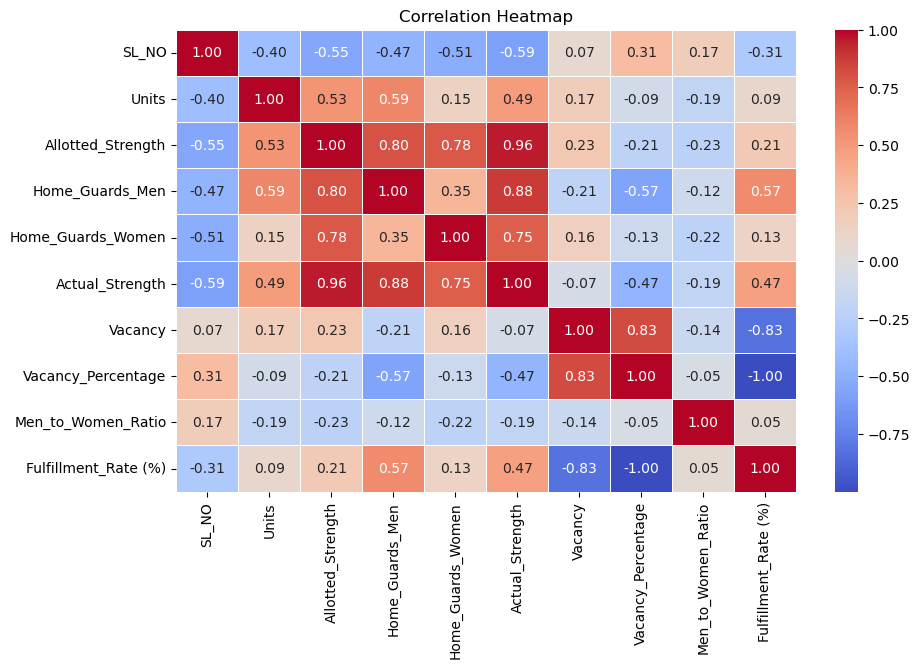

In [443]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Key Observations:
- **Allotted Strength vs. Actual Strength**: A high positive correlation is expected since the actual number of home guards depends on the allotted strength.
- **Vacancy vs. Fulfillment Rate (%)**: A strong negative correlation is expected, as higher vacancies lead to lower fulfillment rates.
- **Men-to-Women Ratio vs. Home Guards Women**: A possible negative correlation could exist if districts with more women home guards have a lower men-to-women ratio.


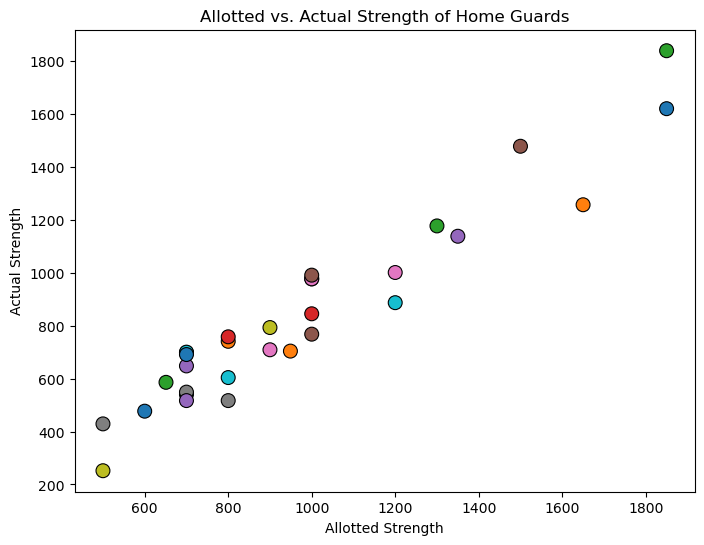

In [566]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Allotted_Strength", y="Actual_Strength", data=df, hue="District", palette="tab10", s=100, edgecolor="black")
plt.xlabel("Allotted Strength")
plt.ylabel("Actual Strength")
plt.title("Allotted vs. Actual Strength of Home Guards")
plt.legend([],[], frameon=False) 
plt.show()

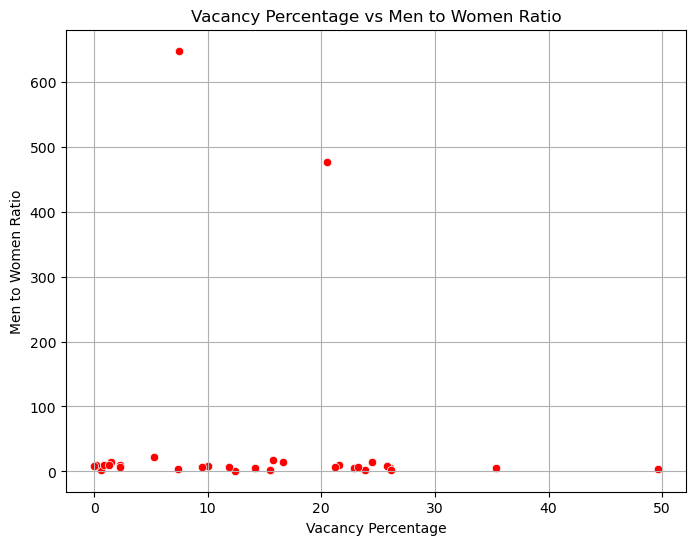

In [445]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Vacancy_Percentage"], y=df["Men_to_Women_Ratio"], color="red")
plt.xlabel("Vacancy Percentage")
plt.ylabel("Men to Women Ratio")
plt.title("Vacancy Percentage vs Men to Women Ratio")
plt.grid(True)
plt.show()

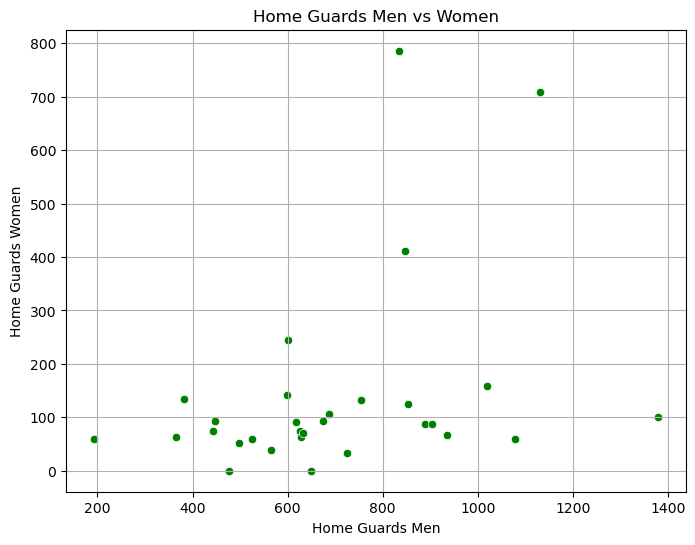

In [446]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Home_Guards_Men"], y=df["Home_Guards_Women"], color="green")
plt.xlabel("Home Guards Men")
plt.ylabel("Home Guards Women")
plt.title("Home Guards Men vs Women")
plt.grid(True)
plt.show()

#### Sactter Plot Analysis
- **Actual Strength vs. Allotted Strength**: Helps analyze how well the actual deployment matches the allotted numbers.
- **Vacancy Percentage vs. Fulfillment Rate (%)**: Shows how vacancies impact overall fulfillment.
- **Home Guards Men vs Women**: Helps understand gender distribution trends.


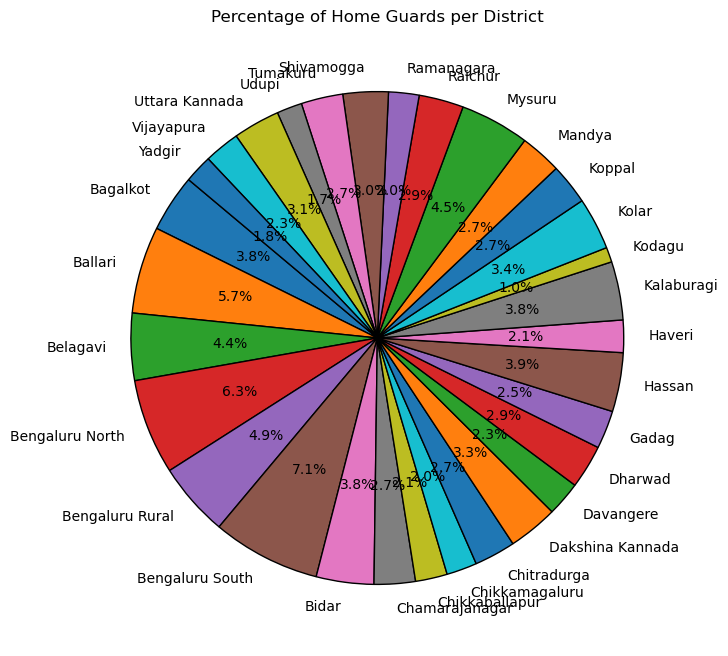

In [447]:
district_strength = df.groupby("District")["Actual_Strength"].sum()

plt.figure(figsize=(8, 8))
plt.pie(district_strength, labels=district_strength.index, autopct="%1.1f%%", startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Percentage of Home Guards per District")
plt.show()

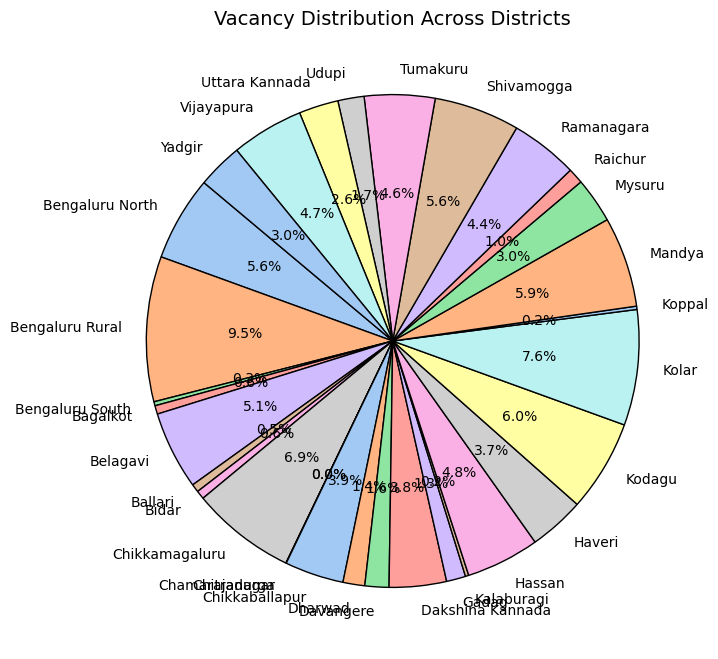

In [448]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")
plt.pie(df["Vacancy"], labels=df["District"], autopct="%.1f%%", startangle=140,
        colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title("Vacancy Distribution Across Districts", fontsize=14)
plt.show()

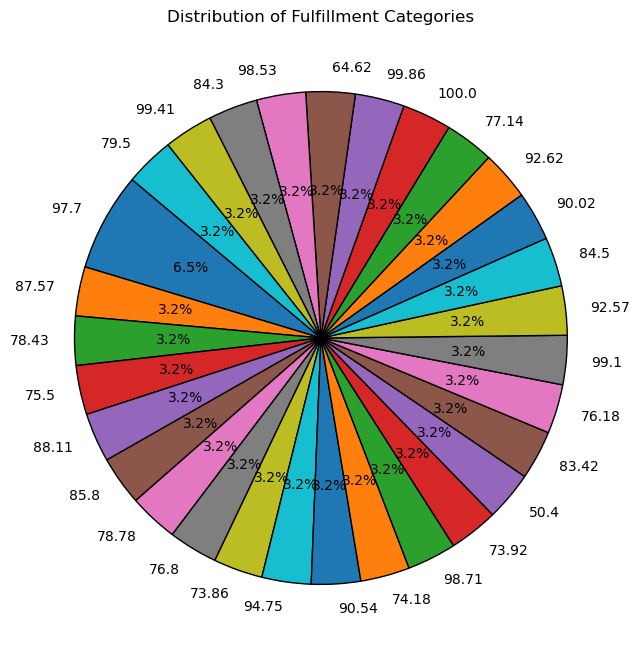

In [449]:
fulfillment_counts = df["Fulfillment_Rate (%)"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fulfillment_counts, labels=fulfillment_counts.index, autopct="%1.1f%%", startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Distribution of Fulfillment Categories")
plt.show()

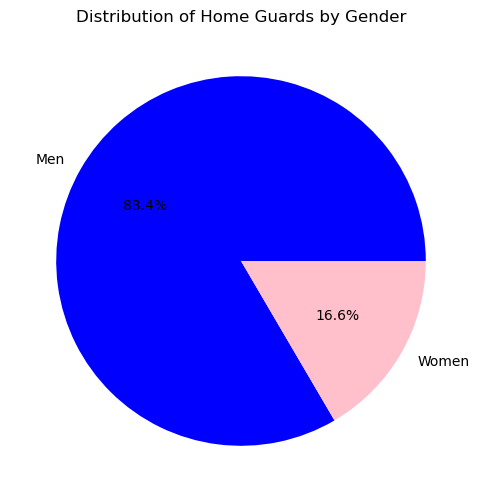

In [450]:
plt.figure(figsize=(6, 6))
plt.pie([df["Home_Guards_Men"].sum(), df["Home_Guards_Women"].sum()], labels=["Men", "Women"], autopct="%.1f%%", colors=["blue", "pink"])
plt.title("Distribution of Home Guards by Gender")
plt.show()

#### Pie Chart Analysis   

**Uneven workforce distribution** across districts highlights potential resource allocation gaps.  
**High vacancy rates** in certain districts suggest recruitment challenges.  
**Fulfillment rate variations** indicate staffing efficiency differences across regions.  
**Gender distribution analysis** helps assess workforce diversity and inclusion efforts.  

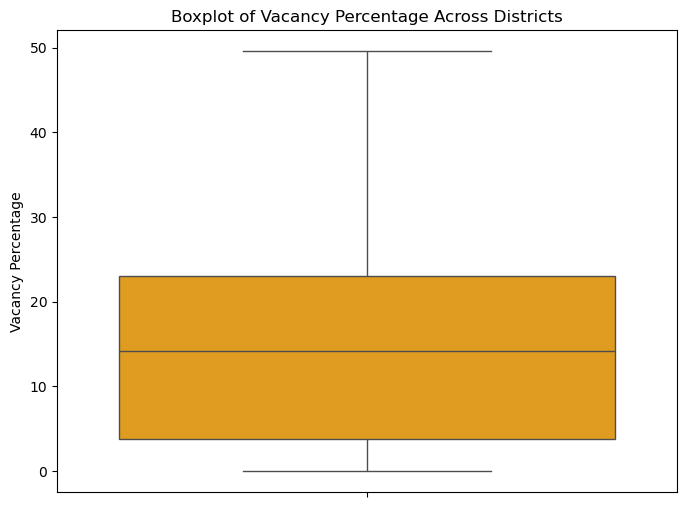

In [451]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["Vacancy_Percentage"], color="orange")
plt.ylabel("Vacancy Percentage")
plt.title("Boxplot of Vacancy Percentage Across Districts")
plt.show()


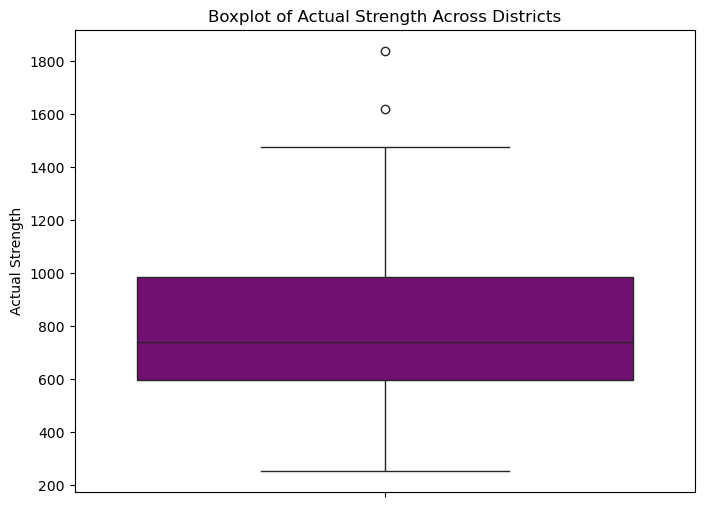

In [452]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["Actual_Strength"], color="purple")
plt.ylabel("Actual Strength")
plt.title("Boxplot of Actual Strength Across Districts")
plt.show()


#### Box Plot Analysis 
**Vacancy Percentage**: Highlights districts with extreme vacancy rates.    
**Actual Strength**: Identifies variations and inconsistencies in workforce allocation.  

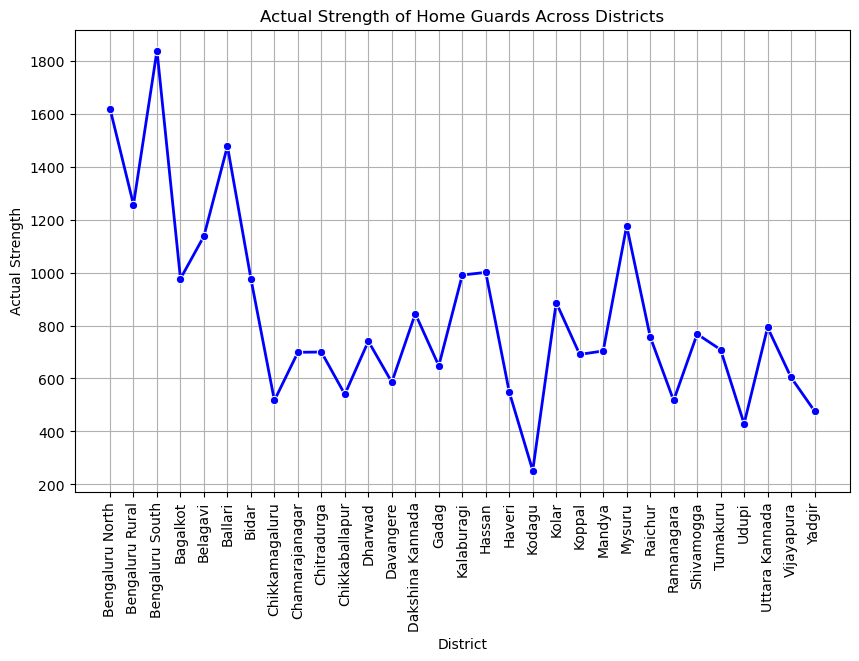

In [453]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["District"], y=df["Actual_Strength"], marker="o", color="blue", linewidth=2)
plt.xticks(rotation=90)
plt.xlabel("District")
plt.ylabel("Actual Strength")
plt.title("Actual Strength of Home Guards Across Districts")
plt.grid(True)
plt.show()

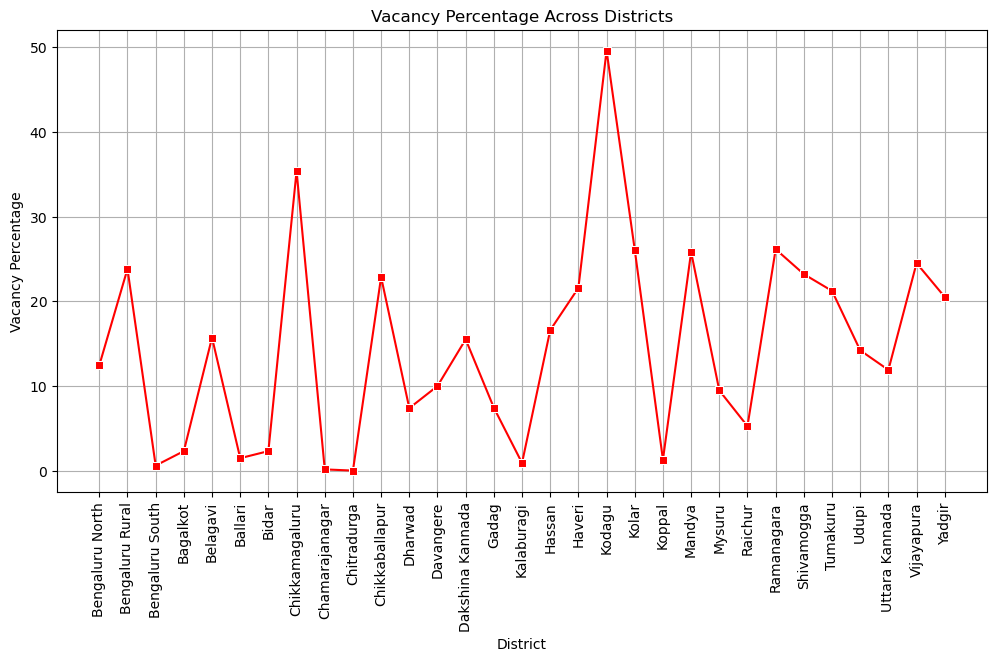

In [454]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["District"], y=df["Vacancy_Percentage"], marker="s", color="red")
plt.xticks(rotation=90)
plt.xlabel("District")
plt.ylabel("Vacancy Percentage")
plt.title("Vacancy Percentage Across Districts")
plt.grid(True)
plt.show()

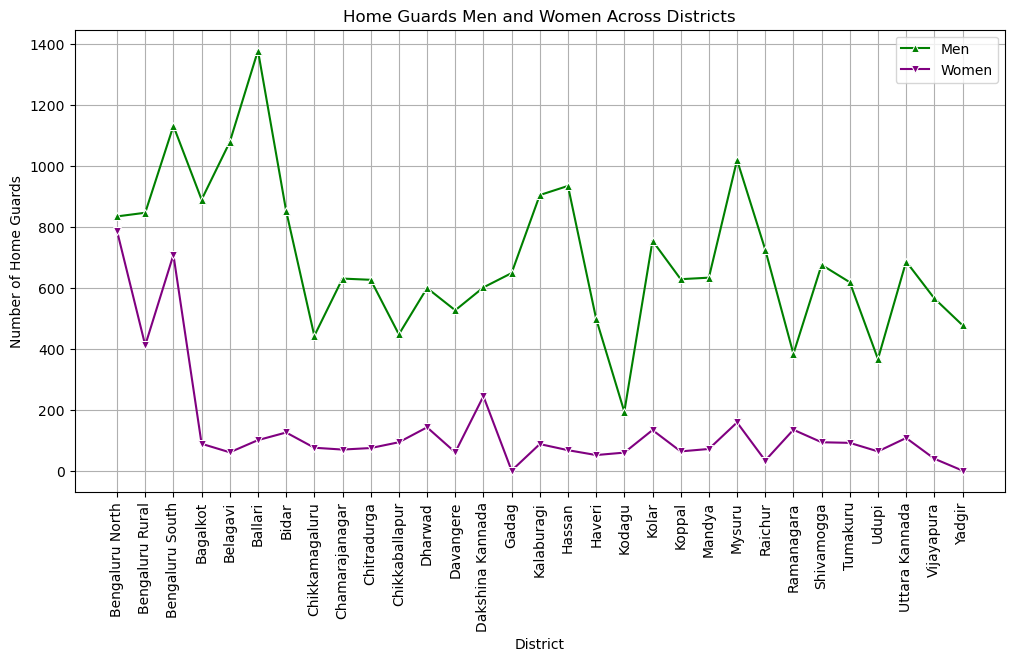

In [455]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["District"], y=df["Home_Guards_Men"], marker="^", label="Men", color="green")
sns.lineplot(x=df["District"], y=df["Home_Guards_Women"], marker="v", label="Women", color="purple")
plt.xticks(rotation=90)
plt.xlabel("District")
plt.ylabel("Number of Home Guards")
plt.title("Home Guards Men and Women Across Districts")
plt.legend()
plt.grid(True)
plt.show()

#### Line Plot Analysis  
  
● **Allotted vs. Actual Strength**: Shows how the actual number of home guards compares to the allotted strength across districts.  
● **Vacancy Trends**: Highlights fluctuations in vacancy percentages among different regions.  
● **Gender Distribution Over Districts**: Helps understand the trend of male vs. female home guards across locations.  

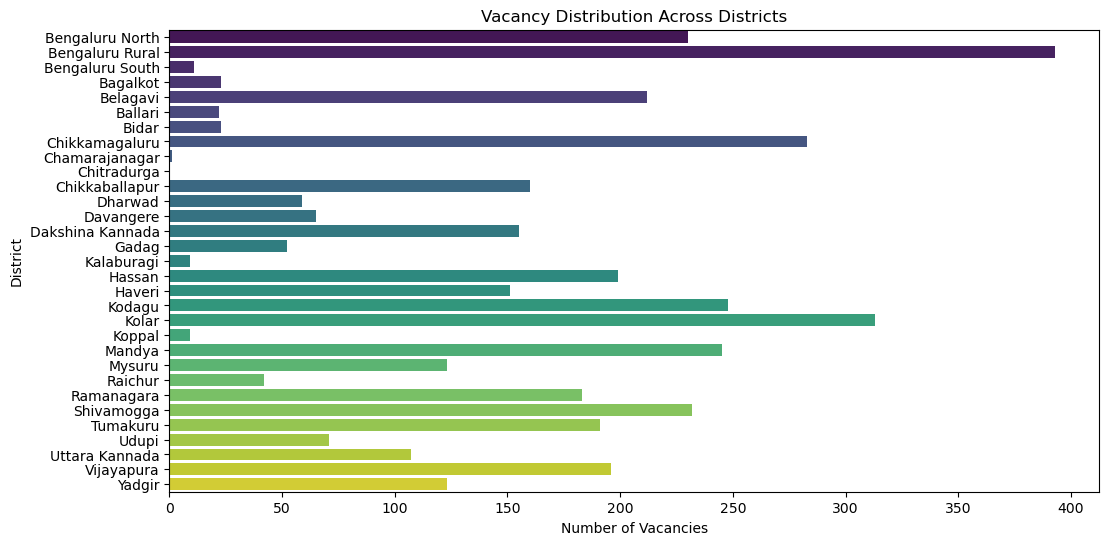

In [456]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Vacancy", y="District", data=df, hue="District",palette="viridis", orient="h", legend=False)
plt.xlabel("Number of Vacancies")
plt.ylabel("District")
plt.title("Vacancy Distribution Across Districts")
plt.show()

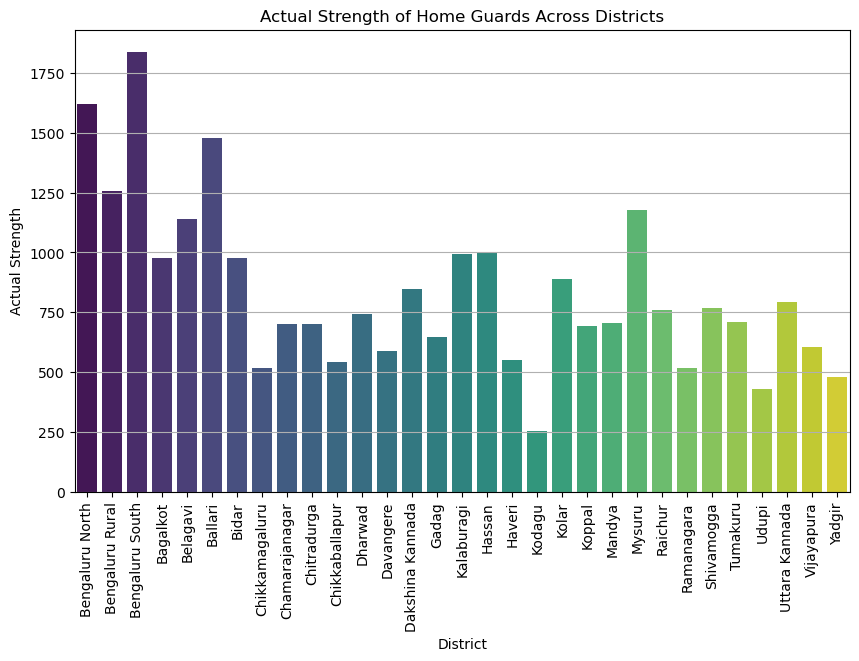

In [457]:
plt.figure(figsize=(10, 6))
sns.barplot(x="District", y="Actual_Strength", data=df, hue="District", palette="viridis", legend=False)
plt.xticks(rotation=90)
plt.xlabel("District")
plt.ylabel("Actual Strength")
plt.title("Actual Strength of Home Guards Across Districts")
plt.grid(axis='y')
plt.show()


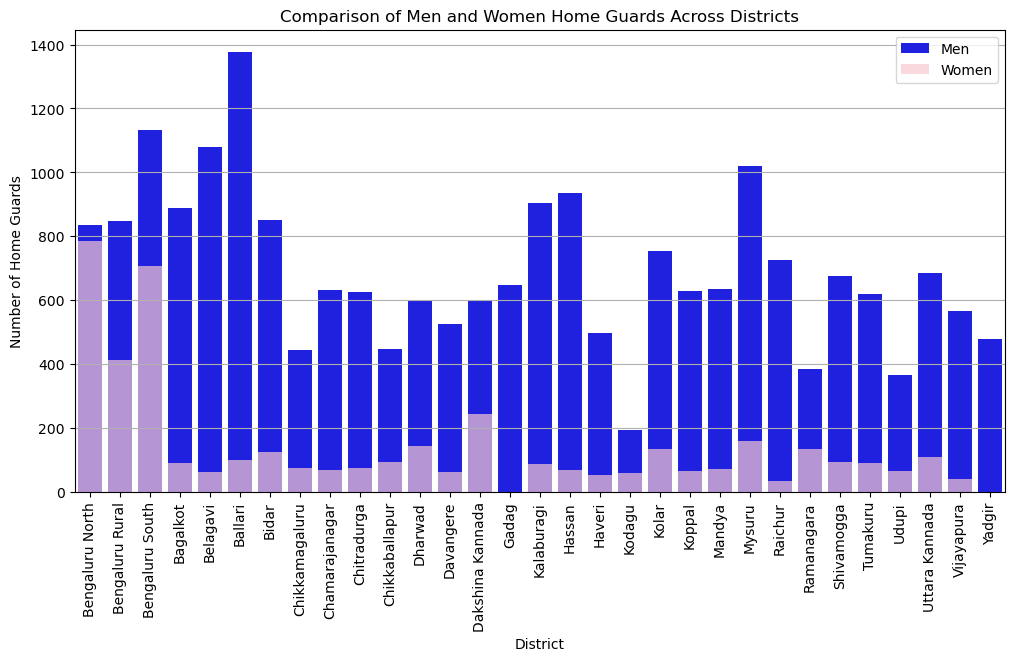

In [458]:
plt.figure(figsize=(12, 6))
sns.barplot(x="District", y="Home_Guards_Men", data=df, color="blue", label="Men")
sns.barplot(x="District", y="Home_Guards_Women", data=df, color="pink", label="Women", alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel("District")
plt.ylabel("Number of Home Guards")
plt.title("Comparison of Men and Women Home Guards Across Districts")
plt.legend()
plt.grid(axis='y')
plt.show()

#### Box Plot Analysis  

● **Vacancy Distribution Across Districts**: Highlights variations in vacancy levels, identifying districts with the highest and lowest vacancies.  
● **Actual Strength of Home Guards Across Districts**: Shows how the actual workforce strength differs across various districts.  
● **Comparison of Men and Women Home Guards Across Districts**: Visualizes the gender distribution and disparities in home guard numbers across regions.  

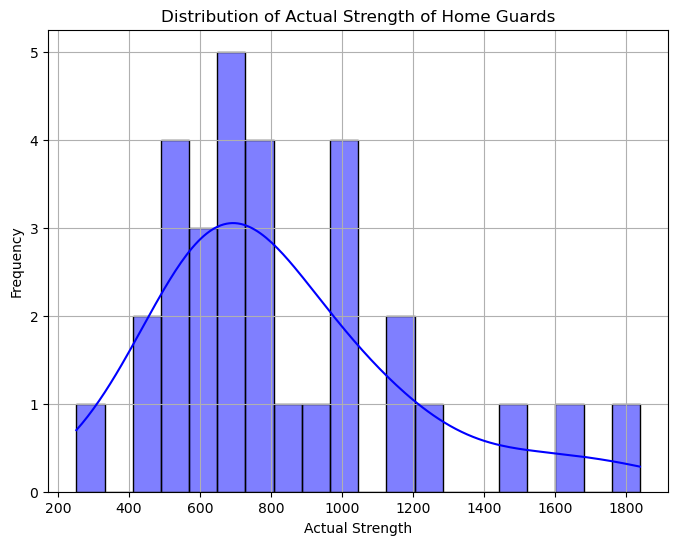

In [459]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Actual_Strength"], bins=20, kde=True, color="blue")
plt.xlabel("Actual Strength")
plt.ylabel("Frequency")
plt.title("Distribution of Actual Strength of Home Guards")
plt.grid(True)
plt.show()

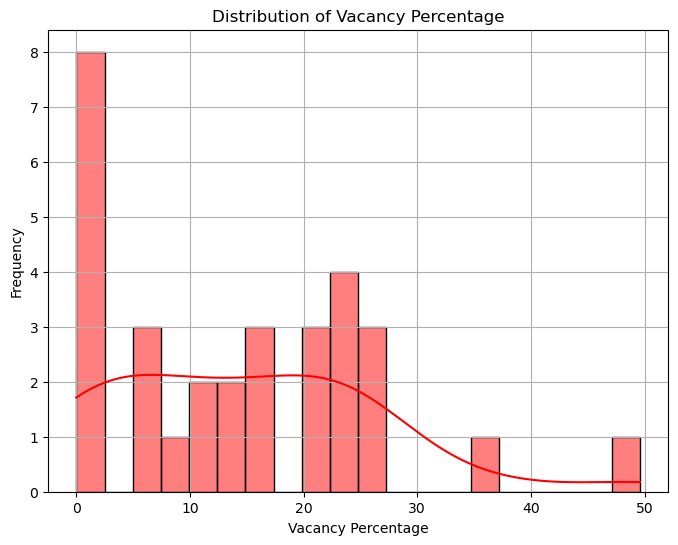

In [460]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Vacancy_Percentage"], bins=20, kde=True, color="red")
plt.xlabel("Vacancy Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Vacancy Percentage")
plt.grid(True)
plt.show()

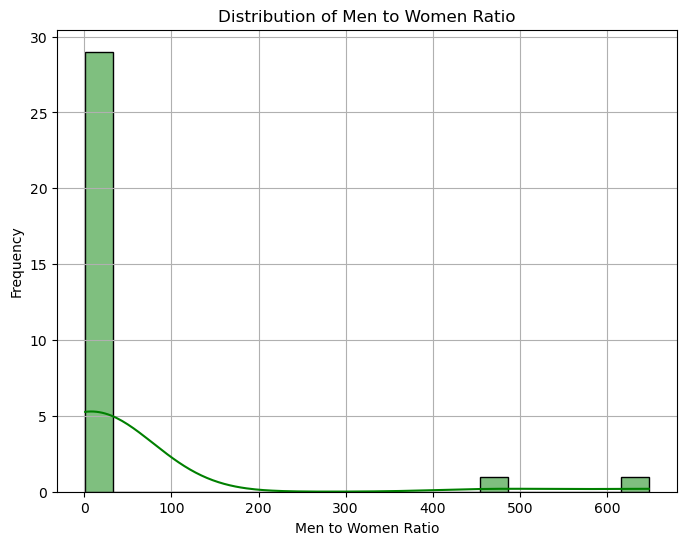

In [461]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Men_to_Women_Ratio"], bins=20, kde=True, color="green")
plt.xlabel("Men to Women Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Men to Women Ratio")
plt.grid(True)
plt.show()




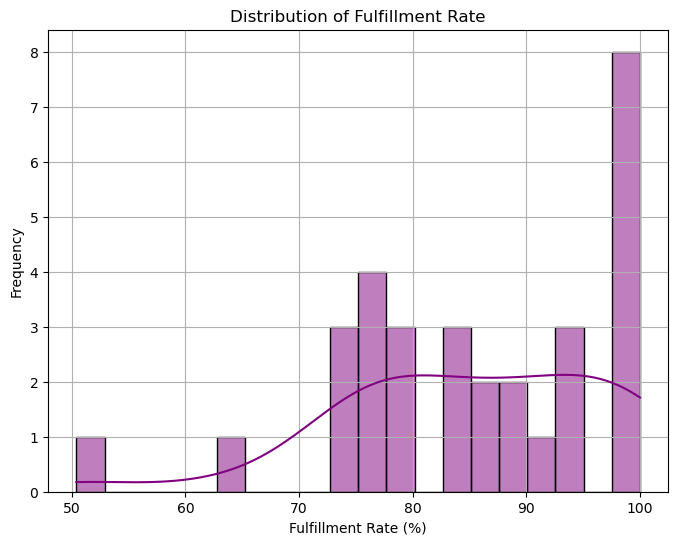

In [462]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Fulfillment_Rate (%)"], bins=20, kde=True, color="purple")
plt.xlabel("Fulfillment Rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Fulfillment Rate")
plt.grid(True)
plt.show()

#### Histogram Analysis 

● **Distribution of Actual Strength of Home Guards**: Shows how the actual workforce strength is distributed across different districts.  
● **Distribution of Vacancy Percentage**: Highlights the spread of vacancy rates, identifying areas with staffing shortages.  
● **Distribution of Men to Women Ratio**: Displays the variation in gender ratio among home guards across districts.  
● **Distribution of Fulfillment Rate**: Represents how efficiently the allotted workforce positions have been filled.  


## Hypothesis Testing
We perform statistical tests, including T-tests, to analyze the significance of differences in various categories.


In [463]:
from scipy import stats


In [464]:
ttest_result = stats.ttest_ind(df["Home_Guards_Men"], df["Home_Guards_Women"], equal_var=False)
print(f"T-test: Statistic={ttest_result.statistic}, p-value={ttest_result.pvalue}")


T-test: Statistic=10.09907931945023, p-value=4.452890967335636e-14


In [465]:
ttest_men_vacancy = stats.ttest_ind(df["Home_Guards_Men"], df["Vacancy"], equal_var=False)
print(f"T-test (Men vs Vacancy): Statistic={ttest_men_vacancy.statistic}, p-value={ttest_men_vacancy.pvalue}")


T-test (Men vs Vacancy): Statistic=11.541947840325077, p-value=2.2732956152764857e-14


In [466]:
mean_actual_strength = df["Actual_Strength"].mean()
mean_home_guards_men = df["Home_Guards_Men"].mean()
mean_home_guards_women = df["Home_Guards_Women"].mean()

In [467]:
ttest_1samp_actual = stats.ttest_1samp(df["Actual_Strength"], mean_actual_strength)
ttest_1samp_men = stats.ttest_1samp(df["Home_Guards_Men"], mean_home_guards_men)
ttest_1samp_women = stats.ttest_1samp(df["Home_Guards_Women"], mean_home_guards_women)

In [468]:
print(f"One-Sample T-test (Actual Strength): Statistic={ttest_1samp_actual.statistic}, p-value={ttest_1samp_actual.pvalue}")
print(f"One-Sample T-test (Home Guards Men): Statistic={ttest_1samp_men.statistic}, p-value={ttest_1samp_men.pvalue}")
print(f"One-Sample T-test (Home Guards Women): Statistic={ttest_1samp_women.statistic}, p-value={ttest_1samp_women.pvalue}")

One-Sample T-test (Actual Strength): Statistic=0.0, p-value=1.0
One-Sample T-test (Home Guards Men): Statistic=0.0, p-value=1.0
One-Sample T-test (Home Guards Women): Statistic=0.0, p-value=1.0


# Data Analysis Report: Home Guards Dataset
### Introduction
This report presents an analysis of the Home Guards dataset, focusing on workforce distribution, vacancies, fulfillment rates, and gender representation across different districts.

### Data Cleaning and Preprocessing
Removed missing values and handled inconsistencies.
Standardized column names and ensured data types were correctly assigned.

### Statistical Summary
Descriptive Statistics: Provided insights into key metrics such as mean, median, standard deviation, and distribution.
Correlation Analysis: Used a heatmap to visualize relationships between numerical features.

### Data Visualizations
#### Pie Charts
Percentage of Home Guards per District: Showed workforce allocation across regions.
Vacancy Distribution Across Districts: Highlighted workforce shortages.
Distribution of Fulfillment Categories: Categorized districts based on workforce fulfillment rates.
Distribution of Home Guards by Gender: Illustrated gender representation.
#### Box Plots
Vacancy Distribution Across Districts: Identified districts with extreme vacancy rates.
Actual Strength of Home Guards Across Districts: Showed workforce distribution across regions.
Comparison of Men and Women Home Guards Across Districts: Analyzed gender-based variations.
#### Histograms
Distribution of Actual Strength of Home Guards: Showed the frequency of workforce deployment.
Distribution of Vacancy Percentage: Highlighted vacancy trends.
Distribution of Men to Women Ratio: Examined gender balance in the workforce.
Distribution of Fulfillment Rate: Measured the efficiency of workforce fulfillment.
#### Line Plots
Actual vs. Allotted Strength: Assessed workforce allocation efficiency.
Vacancy Trends: Analyzed vacancy fluctuations.
Fulfillment Rate (%): Tracked variations in fulfillment efficiency across districts.
Gender Distribution Over Districts: Examined the trend of male vs. female home guards.

### Conclusion
This analysis provided a comprehensive overview of the workforce allocation, vacancy trends, and gender representation within the Home Guards system. The insights derived from these visualizations can aid in policy decisions and workforce planning to improve efficiency and gender balance.

